In [1]:
#import required libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import ipdb
import csv
from linreg_nn import *
from sketch_dec import SketchRNNDecoder
from draw_utils import plot_stroke

In [2]:
sketch_vec = "owl_z.csv"    #shape 100,128
photo_vec = "photo_z.csv"   # shape 100,7,7,160
MODEL_DIR = "./linreg_log/test"

inp, targ = get_csv_dataset()

In [3]:
#load predictions from linear model
my_feature_columns = [tf.feature_column.numeric_column(
        key="x",
        shape=[7 * 7 * 160]
    )]    

my_config = tf.estimator.RunConfig(model_dir=MODEL_DIR)

# create a linear regression model
model = tf.estimator.Estimator(
        model_fn=linreg_fn,
        params={
            'feature_columns': my_feature_columns,
        },
        config=my_config
    )

pred_input_fn = tf.estimator.inputs.numpy_input_fn(
        x={'x': inp},
        y=targ,
        batch_size=BATCH_SIZE,
        shuffle=False,
        num_epochs=1
    )
preds = model.predict(input_fn=pred_input_fn)

INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_tf_random_seed': None, '_task_type': 'worker', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fc9c925b0d0>, '_model_dir': './linreg_log/test', '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_master': '', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_save_summary_steps': 100, '_num_ps_replicas': 0}


In [4]:
#call decoder
decoder = SketchRNNDecoder("/tmp/sketch_rnn/models/owl/lstm_test/")

INFO:tensorflow:Model using cpu.
INFO:tensorflow:Input dropout mode = 0.
INFO:tensorflow:Output dropout mode = 0.
INFO:tensorflow:Recurrent dropout mode = 0.
INFO:tensorflow:Loading model /tmp/sketch_rnn/models/owl/lstm_test/vector.
INFO:tensorflow:Restoring parameters from /tmp/sketch_rnn/models/owl/lstm_test/vector


In [5]:
#place vectors into list
stroke_t = []
stroke_p = []
for i in range(len(targ)):
    stroke_t.append(decoder.draw_from_z(np.expand_dims(targ[i],0)))
for pred in preds:
    stroke_p.append(decoder.draw_from_z(np.expand_dims(pred['sketch_vector'],0)))

INFO:tensorflow:Restoring parameters from ./linreg_log/test/model.ckpt-100000


In [6]:
#Reconstruction display definition
def reconst(row, col, strokes):
    fig = plt.figure()
    gs = gridspec.GridSpec(row, col)
    c=0
    for i in range(row):
        for j in range(col):
            ax = fig.add_subplot(gs[i, j])
            plot_stroke(ax, strokes[c])
            c+=1
    display(plt.show())

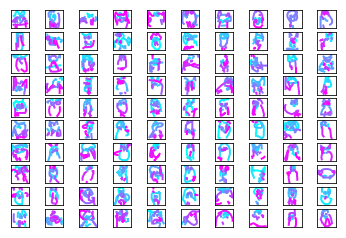

None

In [7]:
#Reconstruction results from targets
reconst(10,10,stroke_t)

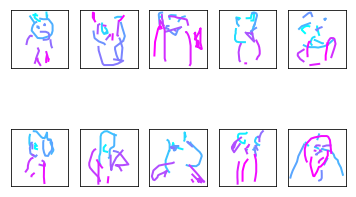

None

In [8]:
#Reconstruction results from predictions
reconst(2,5,stroke_p)